In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r"C:\Users\krish sharma\OneDrive\Desktop\datasets\heart_statlog_cleveland_hungary_final.csv")

In [3]:
df.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


In [4]:
df.isnull().sum()

age                    0
sex                    0
chest pain type        0
resting bp s           0
cholesterol            0
fasting blood sugar    0
resting ecg            0
max heart rate         0
exercise angina        0
oldpeak                0
ST slope               0
target                 0
dtype: int64

In [5]:
df.duplicated().sum()

np.int64(272)

In [6]:
df=df.drop_duplicates()

In [7]:
df

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1185,45,1,1,110,264,0,0,132,0,1.2,2,1
1186,68,1,4,144,193,1,0,141,0,3.4,2,1
1187,57,1,4,130,131,0,0,115,1,1.2,2,1
1188,57,0,2,130,236,0,2,174,0,0.0,2,1


In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 918 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  918 non-null    int64  
 1   sex                  918 non-null    int64  
 2   chest pain type      918 non-null    int64  
 3   resting bp s         918 non-null    int64  
 4   cholesterol          918 non-null    int64  
 5   fasting blood sugar  918 non-null    int64  
 6   resting ecg          918 non-null    int64  
 7   max heart rate       918 non-null    int64  
 8   exercise angina      918 non-null    int64  
 9   oldpeak              918 non-null    float64
 10  ST slope             918 non-null    int64  
 11  target               918 non-null    int64  
dtypes: float64(1), int64(11)
memory usage: 93.2 KB


In [10]:
df.isnull().sum()

age                    0
sex                    0
chest pain type        0
resting bp s           0
cholesterol            0
fasting blood sugar    0
resting ecg            0
max heart rate         0
exercise angina        0
oldpeak                0
ST slope               0
target                 0
dtype: int64

In [11]:
df.describe()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,0.789760,3.251634,132.396514,198.799564,0.233115,0.603486,136.809368,0.404139,0.887364,1.636166,0.553377
std,9.432617,0.407701,0.931031,18.514154,109.384145,0.423046,0.805968,25.460334,0.490992,1.066570,0.609341,0.497414
min,28.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,1.000000,3.000000,120.000000,173.250000,0.000000,0.000000,120.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,4.000000,130.000000,223.000000,0.000000,0.000000,138.000000,0.000000,0.600000,2.000000,1.000000
75%,60.000000,1.000000,4.000000,140.000000,267.000000,0.000000,1.000000,156.000000,1.000000,1.500000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


In [12]:
def check_corr(threshold,dataframe):
    most_corr_features=[]
    for i in range(len(df.columns)):
        for j in range(i+1,len(df.columns)):
            corr=dataframe[dataframe.columns[i]].corr(dataframe[dataframe.columns[j]])
            if corr>threshold:
                most_corr_features.append(dataframe.columns[j])
    most_corr_features=set(most_corr_features)
    return   most_corr_features   

In [13]:
check_corr(0.50,df)

{'ST slope', 'target'}

In [14]:
df['sex'].value_counts()

sex
1    725
0    193
Name: count, dtype: int64

data is imbalanced w.r.t. gender

In [15]:
df['target'].value_counts()

target
1    508
0    410
Name: count, dtype: int64

There is just 50 percent corr

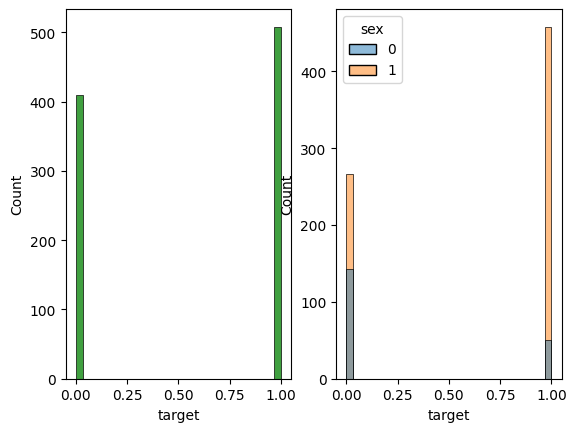

In [16]:
fig,axs=plt.subplots(1,2)

sns.histplot(data=df,x='target',bins=30,color='g',ax=axs[0])

sns.histplot(data=df,x='target',bins=30,hue='sex',ax=axs[1])

plt.show()

0---->female
1---->male
So here there are between 200 to 300 number of males are not 

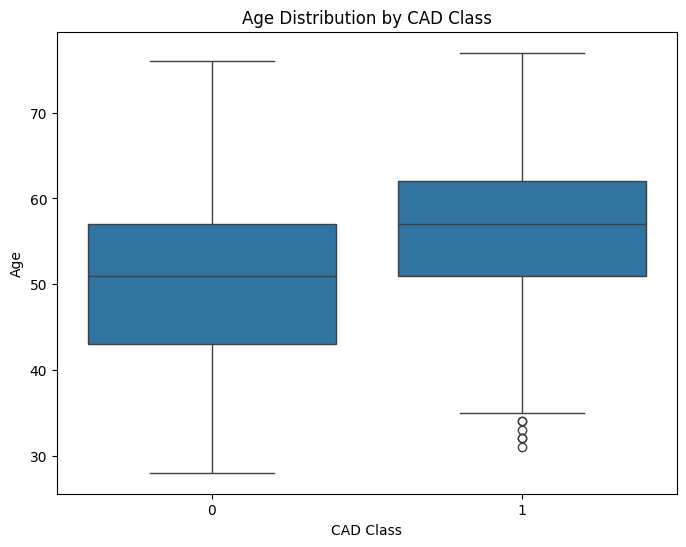

In [17]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x='target', y='age')
plt.title('Age Distribution by CAD Class')
plt.xlabel('CAD Class')
plt.ylabel('Age')
plt.show()

The older the person CAD is more likely to occur 

it has very less amoount of outliers


<Axes: >

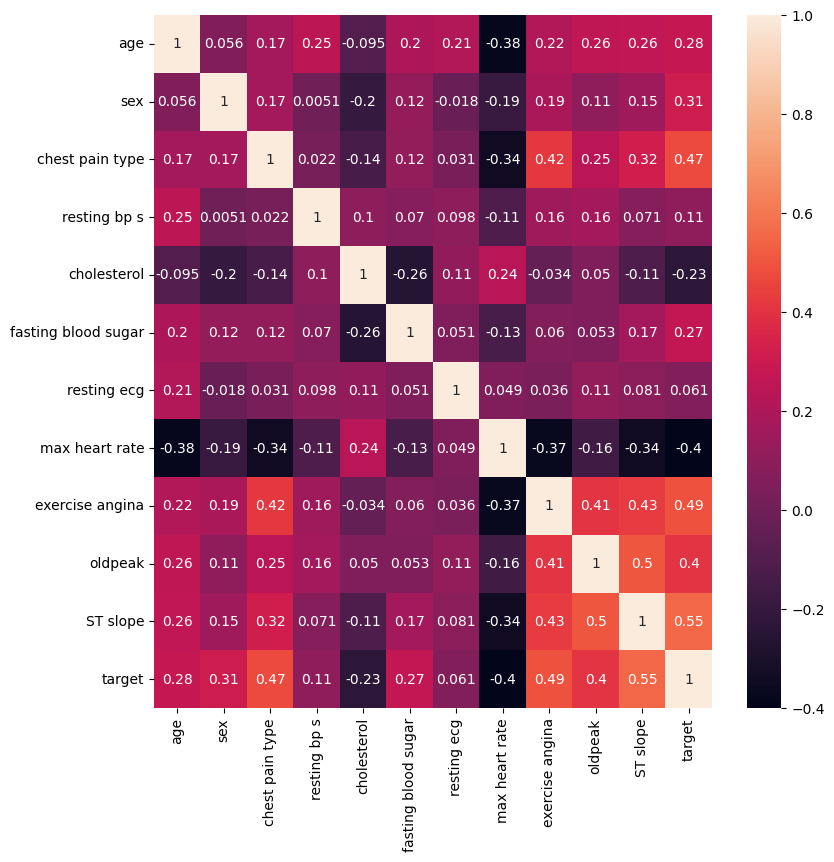

In [19]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,9))
sns.heatmap(df.corr(),annot=True,)

In [18]:
df.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


In [19]:
df.rename(columns={'chest pain type': 'chest_pain_type'}, inplace=True)
df.rename(columns={'resting bp s': 'resting_bp_s'}, inplace=True)
df.rename(columns={'fasting blood sugar': 'fasting_blood_sugar'}, inplace=True)
df.rename(columns={'resting ecg': 'resting_ecg'}, inplace=True)
df.rename(columns={'max heart rate': 'max_heart_rate'}, inplace=True)
df.rename(columns={'exercise angina': 'exercise_angina'}, inplace=True)
df.rename(columns={'ST slope':'ST_slope'},inplace=True)


In [20]:
df.head()

,age,sex,chest_pain_type,resting_bp_s,cholesterol,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_angina,oldpeak,ST_slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


In [21]:
df['target'].value_counts()

target
1    508
0    410
Name: count, dtype: int64

In [24]:
df.to_csv(df.to_csv(r'C:\Users\krish sharma\OneDrive\Documents\cad_dataset',index=False))

',age,sex,chest_pain_type,resting_bp_s,cholesterol,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_angina,oldpeak,ST_slope,target\r\n0,40,1,2,140,289,0,0,172,0,0.0,1,0\r\n1,49,0,3,160,180,0,0,156,0,1.0,2,1\r\n2,37,1,2,130,283,0,1,98,0,0.0,1,0\r\n3,48,0,4,138,214,0,0,108,1,1.5,2,1\r\n4,54,1,3,150,195,0,0,122,0,0.0,1,0\r\n5,39,1,3,120,339,0,0,170,0,0.0,1,0\r\n6,45,0,2,130,237,0,0,170,0,0.0,1,0\r\n7,54,1,2,110,208,0,0,142,0,0.0,1,0\r\n8,37,1,4,140,207,0,0,130,1,1.5,2,1\r\n9,48,0,2,120,284,0,0,120,0,0.0,1,0\r\n10,37,0,3,130,211,0,0,142,0,0.0,1,0\r\n11,58,1,2,136,164,0,1,99,1,2.0,2,1\r\n12,39,1,2,120,204,0,0,145,0,0.0,1,0\r\n13,49,1,4,140,234,0,0,140,1,1.0,2,1\r\n14,42,0,3,115,211,0,1,137,0,0.0,1,0\r\n15,54,0,2,120,273,0,0,150,0,1.5,2,0\r\n16,38,1,4,110,196,0,0,166,0,0.0,2,1\r\n17,43,0,2,120,201,0,0,165,0,0.0,1,0\r\n18,60,1,4,100,248,0,0,125,0,1.0,2,1\r\n19,36,1,2,120,267,0,0,160,0,3.0,2,1\r\n20,43,0,1,100,223,0,0,142,0,0.0,1,0\r\n21,44,1,2,120,184,0,0,142,0,1.0,2,0\r\n22,49,0,2,124

In [29]:
len(df['ST_slope'].value_counts())

4

In [22]:
df.columns

Index(['age', 'sex', 'chest_pain_type', 'resting_bp_s', 'cholesterol',
       'fasting_blood_sugar', 'resting_ecg', 'max_heart_rate',
       'exercise_angina', 'oldpeak', 'ST_slope', 'target'],
      dtype='object')

In [23]:
num_col=[]
cat_col=[]
for i in df.columns:
    if len(df[i].value_counts())>6:
        num_col.append(i)
    else:
        cat_col.append(i)    


In [24]:
print(cat_col)
print(num_col)

['sex', 'chest_pain_type', 'fasting_blood_sugar', 'resting_ecg', 'exercise_angina', 'ST_slope', 'target']
['age', 'resting_bp_s', 'cholesterol', 'max_heart_rate', 'oldpeak']


In [34]:
from sklearn.model_selection import train_test_split

In [36]:
x=df.drop(columns='target',axis=1)
y=df['target']

In [79]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,stratify=y,test_size=0.27)

In [80]:
x_train

,age,sex,chest_pain_type,resting_bp_s,cholesterol,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_angina,oldpeak,ST_slope
729,60,0,4,158,305,0,2,161,0,0.0,1
599,55,1,4,120,226,0,2,127,1,1.7,3
290,36,1,2,120,166,0,0,180,0,0.0,1
689,70,1,2,156,245,0,2,143,0,0.0,1
340,64,0,4,95,0,1,0,145,0,1.1,3
...,...,...,...,...,...,...,...,...,...,...,...
514,62,1,1,112,258,0,1,150,1,1.3,2
304,62,0,4,120,0,1,1,123,1,1.7,3
682,57,1,4,150,276,0,2,112,1,0.6,2
610,62,1,4,158,170,0,1,138,1,0.0,2


In [81]:
x_test

,age,sex,chest_pain_type,resting_bp_s,cholesterol,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_angina,oldpeak,ST_slope
629,44,1,3,140,235,0,2,180,0,0.0,1
576,56,1,4,137,282,1,0,126,1,1.2,2
673,61,1,4,138,166,0,2,125,1,3.6,2
399,52,1,4,165,0,1,0,122,1,1.0,1
556,58,1,3,150,219,0,1,118,1,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...
137,39,1,2,120,241,0,1,146,0,2.0,1
567,41,1,4,150,171,0,0,128,1,1.5,2
11,58,1,2,136,164,0,1,99,1,2.0,2
259,51,0,3,150,200,0,0,120,0,0.5,1


In [82]:
y_train

729    1
599    1
290    0
689    0
340    1
      ..
514    1
304    1
682    1
610    1
62     0
Name: target, Length: 670, dtype: int64

In [83]:
y_test

629    0
576    1
673    1
399    1
556    1
      ..
137    0
567    0
11     1
259    0
49     1
Name: target, Length: 248, dtype: int64

In [84]:
from sklearn.preprocessing import StandardScaler

In [85]:
std=StandardScaler()

In [86]:
x_train=std.fit_transform(x_train)
x_test=std.transform(x_test)

In [87]:
x_train

array([[ 0.64249312, -1.91122416,  0.78627725, ..., -0.83696333,
        -0.82203845, -1.05669279],
       [ 0.11547256,  0.52322486,  0.78627725, ...,  1.19479548,
         0.75821774,  2.2210117 ],
       [-1.88720554,  0.52322486, -1.33366544, ..., -0.83696333,
        -0.82203845, -1.05669279],
       ...,
       [ 0.32628078,  0.52322486,  0.78627725, ...,  1.19479548,
        -0.26430097,  0.58215945],
       [ 0.85330134,  0.52322486,  0.78627725, ...,  1.19479548,
        -0.82203845,  0.58215945],
       [-0.93856854,  0.52322486,  0.78627725, ..., -0.83696333,
        -0.82203845, -1.05669279]], shape=(670, 11))

In [88]:
from sklearn.ensemble import AdaBoostClassifier

In [89]:
ada=AdaBoostClassifier()

In [90]:
a=ada.fit(x_train,y_train)

In [91]:
y_pred=a.predict(x_test)

In [92]:
from sklearn.metrics import accuracy_score

In [93]:
accuracy=accuracy_score(y_true=y_test,y_pred=y_pred)

In [94]:
accuracy

0.8991935483870968

In [59]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score

In [61]:
import pickle as pkl

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier 
from xgboost import XGBRFClassifier
from sklearn.neighbors import KNeighborsClassifier
# import warnings
# warnings.filterwarnings('ignore')




from sklearn.metrics import r2_score

from src.exception import CustomException

from src.logger import logging
from dataclasses import dataclass

from src.utlis import save_object
from src.utlis import evaluate_model

In [60]:
def evaluate_model(x_train,y_train,x_test,y_test,models:dict,param):
     score={}
     for i in range(len(list(models))):
            model=list(models.values())[i]
            model.fit(x_train,y_train)

            para=param[list(param.keys())[i]]
            

            gd=GridSearchCV(model,para,cv=3)
            gd.fit(x_train,y_train)

            model.set_params(**gd.best_params_)
            model.fit(x_train,y_train)

            y_pred=model.predict(x_test)
            r2score=r2_score(y_test,y_pred)

            score[list(models.keys())[i]]=r2score

            return score

In [98]:
def  initiate_model_training(train_arr,test_arr):
                        
                        models = {
                            "LogisticRegression": LogisticRegression(),
                            "KNeighborsClassifier": KNeighborsClassifier(),
                            "AdaBoostClassifier": AdaBoostClassifier(),
                            "RandomForestClassifier": RandomForestClassifier(),
                            # "DecisionTreeClassifier": DecisionTreeClassifier(),
                            # "GradientBoostingClassifier": GradientBoostingClassifier(),
                            # "XGBRFClassifier": XGBRFClassifier()
                        }

                        params_classifier = {
                            "LogisticRegression": 
                                {
                                    'penalty': ['l2', 'none'],
                                    # 'solver': ['lbfgs', 'newton-cg', 'sag', 'saga'],
                                    'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
                                    # 'max_iter': [100, 500, 1000, 2500]
                                },
                                

                            "KNeighborsClassifier": {
                                'n_neighbors': [3, 5, 7, 9],
                                # 'weights': ['uniform', 'distance'],
                                'metric': ['euclidean', 'manhattan', 'minkowski']
                            },

                            "AdaBoostClassifier": {
                                'n_estimators': [50, 100, 150, 200],
                                'learning_rate': [0.01, 0.1, 0.5, 1.0],
                                # 'algorithm': ['SAMME', 'SAMME.R'],
                                # 'estimator': [None, DecisionTreeClassifier(max_depth=1)]  # decision stump option
                            },

                            "RandomForestClassifier": {
                                'n_estimators': [50, 100, 200],
                                'max_depth': [None, 10, 20, 30],
                                'min_samples_split': [2, 5, 10],
                                # 'min_samples_leaf': [1, 2, 4],
                                # 'max_features': ['sqrt', 'log2', None],  # 'auto' can be deprecated
                                # 'bootstrap': [True, False]
                            },

                            # "DecisionTreeClassifier": {
                            #     'criterion': ['gini', 'entropy'],
                            #     'max_depth': [None, 10, 20, 30],
                            #     'min_samples_split': [2, 5, 10],
                            #     # 'min_samples_leaf': [1, 2, 4],
                            #     # 'max_features': ['sqrt', 'log2', None],  # Removed 'auto' to avoid warnings
                            #     # 'splitter': ['best', 'random']
                            # },

                            # "GradientBoostingClassifier": {
                            #     'n_estimators': [50, 100, 200],
                            #     'learning_rate': [0.01, 0.05, 0.1, 0.2],
                            #     'max_depth': [3, 5, 7],
                            #     # 'min_samples_split': [2, 5],
                            #     # 'min_samples_leaf': [1, 2],
                            #     # 'subsample': [0.6, 0.8, 1.0],
                            #     # 'max_features': ['sqrt', 'log2', None]  # Removed 'auto' for consistency
                            # },

                        #     "XGBRFClassifier": {
                        #         'n_estimators': [50, 100, 200],
                        #         'max_depth': [3, 5, 7],
                        #     #     'learning_rate': [0.01, 0.1],
                        #     #     'subsample': [0.6, 0.8, 1.0],
                        #     #     'colsample_bynode': [0.6, 0.8, 1.0],
                        #     #     'min_child_weight': [1, 3, 5]
                        #     }
                        }

                        model_report:dict=evaluate_model(x_train=x_train,y_train=y_train,x_test=x_test,y_test=y_test,models=models)

                        best_score=max(sorted(model_report.values()))

                        # if best_score<0.6:
                        #     raise CustomException("NO best model")
                        
                        # getting best model name
                        best_model_name=list(model_report.keys())[list(model_report.values()).index(best_score)]
                        # .index will give the index of best model score in model report
                        
                        best_model=models[best_model_name]

                        # save_object(
                        #        file_path=self.ModelTrainerConfig.trained_model_file_path,
                        #        obj=best_model
                               
                        # )
                          
                        best_model.fit(x_train,y_train)
                        y_pred=best_model.predict(x_test)

                        r2score=r2_score(y_test,y_pred)

                        return (r2score,best_model)


In [99]:
initiate_model_training(train_arr=x_train,test_arr=y_train)

(0.6901426974419675, RandomForestClassifier())

In [76]:
import numpy as np
print(np.bincount(y_train.astype(int)))

[306 364]


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 918 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  918 non-null    int64  
 1   sex                  918 non-null    int64  
 2   chest_pain_type      918 non-null    int64  
 3   resting_bp_s         918 non-null    int64  
 4   cholesterol          918 non-null    int64  
 5   fasting_blood_sugar  918 non-null    int64  
 6   resting_ecg          918 non-null    int64  
 7   max_heart_rate       918 non-null    int64  
 8   exercise_angina      918 non-null    int64  
 9   oldpeak              918 non-null    float64
 10  ST_slope             918 non-null    int64  
 11  target               918 non-null    int64  
dtypes: float64(1), int64(11)
memory usage: 93.2 KB


In [78]:
print(df.nunique())


age                     50
sex                      2
chest_pain_type          4
resting_bp_s            67
cholesterol            222
fasting_blood_sugar      2
resting_ecg              3
max_heart_rate         119
exercise_angina          2
oldpeak                 53
ST_slope                 4
target                   2
dtype: int64


In [95]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(x_train, y_train)
print("Train acc:", clf.score(x_train, y_train))
print("Test acc:", clf.score(x_test, y_test))


Train acc: 0.844776119402985
Test acc: 0.875


In [25]:
print(cat_col)

['sex', 'chest_pain_type', 'fasting_blood_sugar', 'resting_ecg', 'exercise_angina', 'ST_slope', 'target']


In [36]:
df['chest_pain_type'].unique()

array([2, 3, 4, 1])

In [32]:
df.head()

,age,sex,chest_pain_type,resting_bp_s,cholesterol,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_angina,oldpeak,ST_slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


In [38]:
for i in cat_col:
    print(i,df[i].unique())

sex [1 0]
chest_pain_type [2 3 4 1]
fasting_blood_sugar [0 1]
resting_ecg [0 1 2]
exercise_angina [0 1]
ST_slope [1 2 3 0]
target [0 1]
